In [1]:
from pathlib import Path

import pandas as pd

from util import path_input_csv, path_model
from evaluation import PerplexityCalculator

# df = pd.read_csv(path_input_csv)
df = pd.read_csv("../../submissions/submission_248.697733.csv")

calculator = PerplexityCalculator(path_model)

/home/khorie/anaconda3/envs/kaggle3.11-3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]


In [2]:
n_idx = 0
text = df.iloc[n_idx, 1]

print(text)
ppl, list_tokenwise_loss = calculator.get_perplexity(text, return_tokenwise_loss=True)

reindeer mistletoe elf gingerbread family advent scrooge chimney fireplace ornament


In [3]:
print(ppl)
print(list_tokenwise_loss)

469.67387656945436
[1.4531483e+01 8.1449604e+00 1.2646184e+01 7.6375015e-02 6.0066624e+00
 4.6919641e+00 6.3634195e+00 6.6076541e+00 1.0365403e+01 1.4220772e+00
 2.0935065e-03 5.2211485e+00 3.7031126e+00 5.5353680e+00 6.9626741e+00]


In [4]:
text_with_special = (
    f"{calculator.tokenizer.bos_token}{text}{calculator.tokenizer.eos_token}"
)
tokens = calculator.tokenizer.tokenize(text_with_special)

In [5]:
tokens

['<bos>',
 're',
 'indeer',
 '▁mist',
 'letoe',
 '▁elf',
 '▁gingerbread',
 '▁family',
 '▁advent',
 '▁sc',
 'roo',
 'ge',
 '▁chimney',
 '▁fireplace',
 '▁ornament',
 '<eos>']

In [6]:
for token, loss in zip(tokens[1:], list_tokenwise_loss):
    print(f"{token}:\t {loss}")

re:	 14.531482696533203
indeer:	 8.144960403442383
▁mist:	 12.646183967590332
letoe:	 0.07637501507997513
▁elf:	 6.006662368774414
▁gingerbread:	 4.691964149475098
▁family:	 6.363419532775879
▁advent:	 6.607654094696045
▁sc:	 10.365403175354004
roo:	 1.4220771789550781
ge:	 0.0020935065113008022
▁chimney:	 5.221148490905762
▁fireplace:	 3.7031126022338867
▁ornament:	 5.535367965698242
<eos>:	 6.962674140930176


In [7]:
import numpy as np


def get_list_index_word_start(tokens):
    if tokens[0] != "<bos>":
        raise ValueError("The first token should be <bos>")
    if tokens[-1] != "<eos>":
        raise ValueError("The last token should be <eos>")
    ret_list = []
    for i, token in enumerate(tokens):
        if (
            (token == "<bos>")
            or (token == "<eos>")
            or (token.startswith("▁"))
            or (i == 1)
        ):
            ret_list.append(i)
    ret_list.append(len(tokens))
    return ret_list


list_start = get_list_index_word_start(tokens)
# for i in list_start[:-1]:
#     print(tokens[i])

words = text.split()
words_with_special = ["<bos>"] + text.split() + ["<eos>"]


def get_words_with_special(words_or_text):
    if isinstance(words_or_text, str):
        return ["<bos>"] + words_or_text.split() + ["<eos>"]
    elif isinstance(words_or_text, list):
        return ["<bos>"] + words_or_text + ["<eos>"]
    else:
        raise ValueError("words_or_text should be either str or list")


def get_list_wordwise_loss(
    words,
    tokenizer=None,
    list_tokenwise_loss=None,
):
    if tokenizer is None:
        tokenizer = calculator.tokenizer
    if list_tokenwise_loss is None:
        _, list_tokenwise_loss = calculator.get_perplexity(
            text, return_tokenwise_loss=True
        )
    text_with_special = f"{tokenizer.bos_token}{' '.join(words)}{tokenizer.eos_token}"
    list_start = get_list_index_word_start(tokenizer.tokenize(text_with_special))
    ret_list = []
    # print(list_start)
    # print(tokenizer.tokenize(text_with_special))
    for i in range(len(list_start) - 2):
        ret_list.append(
            np.mean(list_tokenwise_loss[list_start[i + 1] - 1 : list_start[i + 2] - 1])
        )

    return ret_list


list_wordwise_loss = get_list_wordwise_loss(
    words,
)

print(len(list_wordwise_loss), len(words_with_special))

for wordwise_loss, word in zip(list_wordwise_loss, words_with_special[1:]):
    print(f"{word}:\t {wordwise_loss}")


# for i in range(len(list_start) - 2):
#     print(
#         i,
#         tokens[list_start[i + 1] : list_start[i + 2]],
#         words_with_special[i],
#         words_with_special[i + 1],
#         list_tokeniwise_loss[list_start[i + 1] - 1 : list_start[i + 2] - 1],
#     )


11 12
reindeer:	 11.338221549987793
mistletoe:	 6.361279487609863
elf:	 6.006662368774414
gingerbread:	 4.691964149475098
family:	 6.363419532775879
advent:	 6.607654094696045
scrooge:	 3.9298579692840576
chimney:	 5.221148490905762
fireplace:	 3.7031126022338867
ornament:	 5.535367965698242
<eos>:	 6.962674140930176


In [8]:
n_idx = 0
text = df.iloc[n_idx, 1]
words = text.split()

words_with_special = get_words_with_special(words)
list_wordwise_loss = get_list_wordwise_loss(words)

for i, wordwise_loss in enumerate(list_wordwise_loss):
    print(f"{words_with_special[i]} -> {words_with_special[i+1]}:\t {wordwise_loss}")


<bos> -> reindeer:	 11.338221549987793
reindeer -> mistletoe:	 6.361279487609863
mistletoe -> elf:	 6.006662368774414
elf -> gingerbread:	 4.691964149475098
gingerbread -> family:	 6.363419532775879
family -> advent:	 6.607654094696045
advent -> scrooge:	 3.9298579692840576
scrooge -> chimney:	 5.221148490905762
chimney -> fireplace:	 3.7031126022338867
fireplace -> ornament:	 5.535367965698242
ornament -> <eos>:	 6.962674140930176


In [9]:
len(words_with_special)

12

In [10]:
import random
from collections import defaultdict

from tqdm.auto import tqdm, trange

# dict_table_wordwise_loss = defaultdict(lambda: defaultdict(list))

n_idx = 1
text = df.iloc[n_idx, 1]
words = text.split()
words_with_special = get_words_with_special(words)


table_wordwise_loss = [
    [[] for _ in range(len(words_with_special) - 1)]
    for _ in range(len(words_with_special) - 1)
]

word_to_idx = {word: i for i, word in enumerate(words_with_special)}
idx_to_word = {i: word for i, word in enumerate(words_with_special)}

for _ in trange(1000):
    random.shuffle(words)

    words_with_special = get_words_with_special(words)
    list_wordwise_loss = get_list_wordwise_loss(words)

    for i, wordwise_loss in enumerate(list_wordwise_loss):
        # dict_table_wordwise_loss[words_with_special[i]][
        #     words_with_special[i + 1]
        # ].append(wordwise_loss)
        idx1 = word_to_idx[words_with_special[i]]
        idx2 = word_to_idx[words_with_special[i + 1]] - 1
        # print(idx1, idx2)
        table_wordwise_loss[idx1][idx2].append(wordwise_loss)

100%|██████████| 1000/1000 [00:36<00:00, 27.50it/s]


/home/khorie/anaconda3/envs/kaggle3.11-3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/khorie/anaconda3/envs/kaggle3.11-3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


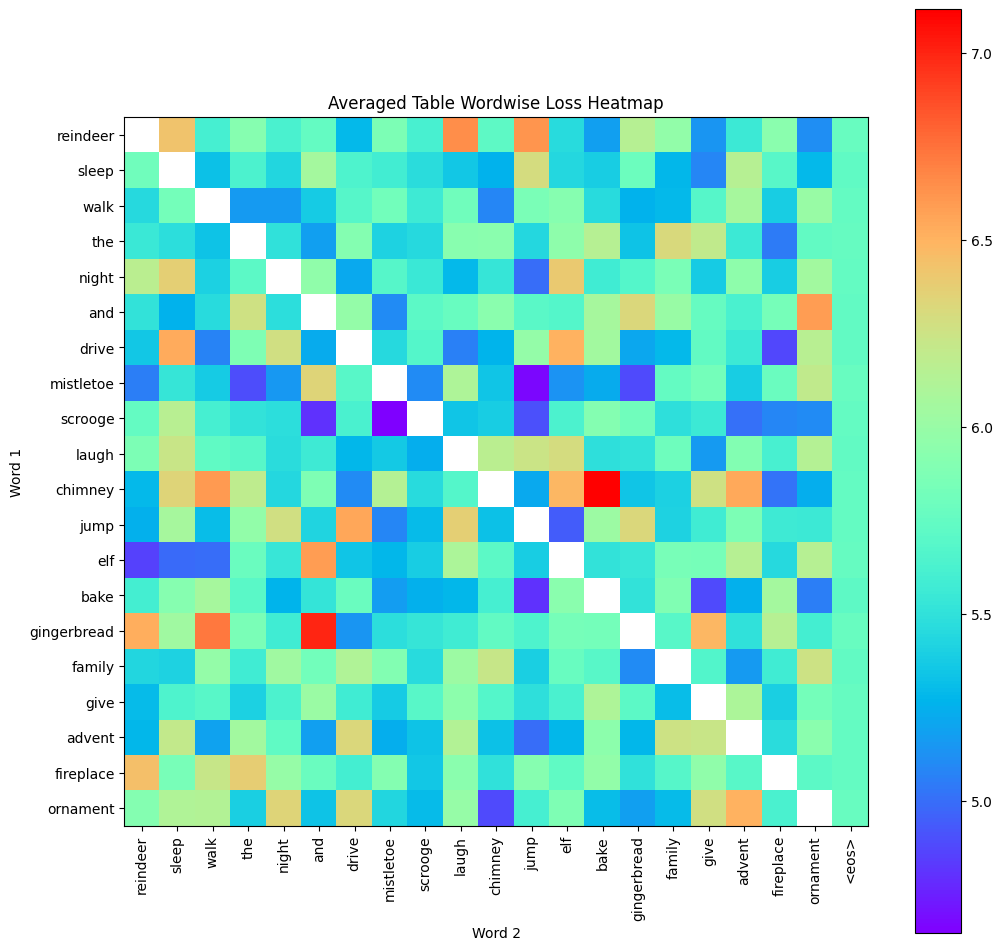

In [11]:
import numpy as np

import matplotlib.pyplot as plt

text = df.iloc[n_idx, 1]
words = text.split()
words_with_special = get_words_with_special(words)

# Convert the table_wordwise_loss to a numpy array
averaged_table = [[np.mean(cell) for cell in row] for row in table_wordwise_loss]
averaged_table = np.array(averaged_table)

averaged_table = averaged_table[1:]


# Create the heatmap
plt.figure(figsize=(12, 12))
plt.imshow(averaged_table, cmap="rainbow", interpolation="nearest")
plt.colorbar()

# Set the x and y axis labels
plt.xlabel("Word 2")
plt.ylabel("Word 1")

# set ticks
plt.xticks(range(len(words_with_special) - 1), words_with_special[1:], rotation=90)
# plt.yticks(range(len(words_with_special) - 1), words_with_special[:-1])
plt.yticks(range(len(words_with_special) - 2), words_with_special[1:-1])

# Set the title of the plot
plt.title("Averaged Table Wordwise Loss Heatmap")

# Show the plot
plt.show()